In [1]:
import numpy as np
import physbo
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def load_data():
    A =  np.asarray( np.loadtxt('data/s5-210.csv',skiprows=1,delimiter=',') )
    X = A[:,0:3]
    t  = -A[:,3]
    return X, t

In [3]:
# Load the data  
# X is the N x d dimensional matrix. Each row of X denotes the d-dimensional feature vector of search candidate. 
# t is the N-dimensional vector that represents the corresponding negative energy of search candidates. 
# ( It is of course unknown in practice. )
X, t = load_data()
 
# Normalize the mean and standard deviation along the each column of X to 0 and 1, respectively
X = physbo.misc.centering( X )

In [4]:
# Declare the class for calling the simulator. 
# In this tutorial, we simply refer to the value of t. 
# If you want to apply physbo to other problems, you have to customize this class. 
class simulator:
    def __init__( self ):
        _, self.t = load_data()
    
    def __call__( self, action ):
        return self.t[action]

In [5]:
# Design of policy

# Declaring the policy by 
policy = physbo.search.discrete.policy(test_X=X)
# test_X is the set of candidates which is represented by numpy.array.
# Each row vector represents the feature vector of the corresponding candidate

# set the seed parameter 
policy.set_seed( 0 )

In [6]:
# How to use the interactive mode 
simulator = simulator()

''' 1st step (random sampling) '''
actions = policy.random_search(max_num_probes=1, num_search_each_probe=10, simulator=None)
t  = simulator(actions)
policy.write(actions, t)
physbo.search.utility.show_search_results(policy.history, 10)

''' 2nd step (random sampling) '''
actions = policy.random_search(max_num_probes=1, num_search_each_probe=10, simulator=None)
t = simulator(actions)
policy.write(actions, t)
physbo.search.utility.show_search_results(policy.history, 10)

''' 3rd step (bayesian optimization) '''
actions = policy.bayes_search(max_num_probes=1, num_search_each_probe=10, 
                                                      simulator=None, score='EI', interval=0,  num_rand_basis = 0)
t = simulator(actions)   # experiment
policy.write(actions, t) # record new observations
physbo.search.utility.show_search_results(policy.history, 10)  # describe search results

predictor = policy.predictor
training = policy.training

actions = policy.bayes_search(max_num_probes=1, num_search_each_probe=10, 
                                                      predictor=predictor, training=training,
                                                      simulator=None, score='EI', interval=0,  num_rand_basis = 0)
t = simulator(actions)   # experiment
policy.write(actions, t) # record new observations
physbo.search.utility.show_search_results(policy.history, 10)  # describe search results



''' 4-th step (bayesian optimization) '''
actions = policy.bayes_search(max_num_probes=1, num_search_each_probe=10, 
                                                      simulator=None, score='EI', interval=0,  num_rand_basis = 0)
t = simulator(actions)   # experiment
policy.write(actions, t) # record new observations
physbo.search.utility.show_search_results(policy.history, 10)  # describe search results

predictor = policy.predictor
training = policy.training

actions = policy.bayes_search(max_num_probes=1, num_search_each_probe=10, 
                                                      predictor=predictor, training=training,
                                                      simulator=None, score='EI', interval=0,  num_rand_basis = 0)
t = simulator(actions)   # experiment
policy.write(actions, t) # record new observations
physbo.search.utility.show_search_results(policy.history, 10)  # describe search results

interactive mode stars ... 
 
0001-th multiple probe search (random) 

current best f(x) = -0.980054 (best action = 4547) 
list of simulation results
f(x)=-1.070602 (action = 15673)
f(x)=-1.009056 (action = 9559)
f(x)=-1.195844 (action = 16927)
f(x)=-0.980054 (action = 4547)
f(x)=-0.992820 (action = 2553)
f(x)=-1.146676 (action = 13144)
f(x)=-1.006255 (action = 10827)
f(x)=-0.999862 (action = 1995)
f(x)=-1.055445 (action = 10763)
f(x)=-1.100970 (action = 16450)


0002-th multiple probe search (random) 

current best f(x) = -0.980054 (best action = 4547) 
list of simulation results
f(x)=-1.208666 (action = 13085)
f(x)=-1.069404 (action = 15133)
f(x)=-1.031642 (action = 1706)
f(x)=-1.016702 (action = 2464)
f(x)=-1.172569 (action = 17812)
f(x)=-1.082219 (action = 16533)
f(x)=-1.025272 (action = 1336)
f(x)=-1.031761 (action = 10076)
f(x)=-0.984972 (action = 8876)
f(x)=-1.107730 (action = 15577)


Start the initial hyper parameter searching ...
Done

Start the hyper parameter learning ...
0

In [7]:
policy.save(file_predictor='predictor.dump', file_training='training.npz', file_history='history.npz')

In [8]:
''' delete policy'''
del policy

policy = physbo.search.discrete.policy(test_X=X)
policy.load(file_predictor='predictor.dump', file_training='training.npz', file_history='history.npz')

''' 5-th probe (bayesian optimization) '''
actions = policy.bayes_search(max_num_probes=1, num_search_each_probe=10, predictor=predictor, 
                                                      simulator=None, score='EI', interval=0,  num_rand_basis = 0)
t = simulator(actions)   # experiment
policy.write(actions, t) # record new observations
physbo.search.utility.show_search_results(policy.history, 10)  # describe search result


Start the initial hyper parameter searching ...
Done

Start the hyper parameter learning ...
0 -th epoch marginal likelihood 102.79234416128759
50 -th epoch marginal likelihood 59.46342203323704
100 -th epoch marginal likelihood 30.31762172369963
150 -th epoch marginal likelihood 10.5146074126326
200 -th epoch marginal likelihood -3.2736730608166056
250 -th epoch marginal likelihood -13.082561478601065
300 -th epoch marginal likelihood -20.188910676268563
350 -th epoch marginal likelihood -25.417528243407048
400 -th epoch marginal likelihood -29.315852863500695
450 -th epoch marginal likelihood -32.256081675862205
500 -th epoch marginal likelihood -34.49663444237708
Done

0007-th multiple probe search (EI) 

current best f(x) = -0.958539 (best action = 8657) 
list of simulation results
f(x)=-1.023136 (action = 3551)
f(x)=-1.015942 (action = 3797)
f(x)=-1.005346 (action = 687)
f(x)=-0.996667 (action = 517)
f(x)=-1.101119 (action = 3874)
f(x)=-0.969981 (action = 3646)
f(x)=-0.990435 (act

In [9]:
res=policy.history

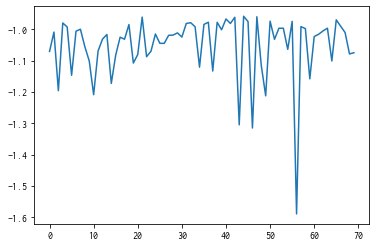

In [10]:
plt.plot(res.fx[0:res.total_num_search])